In [1]:
%matplotlib inline

import re
import numpy as np
import pandas as pd
import subprocess
import os
import os.path
import time

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [2]:
# Generate unique filename
test_filename = "blocksize_benchmark_run_0.txt"
file_test = 0
while (os.path.isfile(test_filename)):

    test_filename = "blocksize_benchmark_run_" + str(file_test) + ".txt"
    file_test += 1
    
    
#Use the existing file, do not generate new data
test_filename = "blocksize_benchmark_run_0.txt"
print("Storing data in " + test_filename)

Storing data in blocksize_benchmark_run_0.txt


In [3]:
def runBenchmark(filename):
    sim = np.array(["FBL", "CTCS", "KP", "CDKLM"])
    block_width = np.array([4, 8, 12, 16, 24, 32])
    block_height = np.array([4, 8, 12, 16, 24, 32])

    block_width, block_height = np.meshgrid(block_width, block_height)
    
    with open(test_filename, 'w') as test_file:
        for k in range(len(sim)):
            test_file.write("##########################################################################\n")
            test_file.write("Using simulator " + sim[k] + ".\n")
            test_file.write("##########################################################################\n")
            for j in range(block_width.shape[1]):
                for i in range(block_width.shape[0]):
                    
                    tic = time.time()
                    
                    test_file.write("=========================================\n")
                    test_file.write(sim[k] + " [{:02d} x {:02d}]\n".format(block_width[i,j], block_height[i,j]))
                    test_file.write("-----------------------------------------\n")
                    cmd = [ "python", "run_benchmark.py", "--block_width", str(block_width[i,j]), "--block_height", str(block_height[i,j]), "--simulator", sim[k]]
                    p = subprocess.Popen(cmd, shell=True, stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
                    output = p.stdout.read()
                    test_file.write(output + "\n")
                    test_file.write("=========================================\n")
                    test_file.write("\n")
                    
                    toc = time.time()
                    
                    infostr = sim[k] + " [{:02d} x {:02d}] completed in {:.02f} s\n".format(block_width[i,j], block_height[i,j], (toc-tic))
                    test_file.write(infostr)
                    print(infostr)
                    
            test_file.write("\n\n\n")
            test_file.flush()
            os.fsync(test_file)


if not (os.path.isfile(test_filename)):
    runBenchmark(test_filename)
else:
    print("Using existing run in " + test_filename)

Using existing run in blocksize_benchmark_run_0.txt


In [4]:
def getData(filename):
    # State variables
    simulator = None
    block_width = None
    block_height = None

    data = np.empty((0, 4))

    with open(filename) as origin_file:
        for line in origin_file:

            # Find simulator
            match = re.findall(r'(Using simulator)', line)
            if match:
                simulator = line.split(' ')[2][:-2]

            # Find block size
            match = re.findall(r'(Running with domain size)', line)
            if match:
                block_width = line.split(' ')[10][1:]
                block_height = line.split(' ')[12][:-1]

            # Find simulator megacells
            match = re.findall(r'(Maximum megacells)', line)
            if match:
                megacells = float(line.split(' ')[4])
                data = np.append(data, [[simulator, block_width, block_height, megacells]], axis=0)
                
                block_width = None
                block_height = None

    return data

data = getData(test_filename)
print(data)

[['FBL' '04' '04' '289.72909841']
 ['FBL' '04' '08' '504.66817314']
 ['FBL' '04' '12' '646.62141673']
 ['FBL' '04' '16' '810.04451928']
 ['FBL' '04' '24' '814.00080831']
 ['FBL' '04' '32' '814.99592629']
 ['FBL' '08' '04' '541.41851567']
 ['FBL' '08' '08' '816.6599006']
 ['FBL' '08' '12' '816.99347933']
 ['FBL' '08' '16' '819.33634269']
 ['FBL' '08' '24' '813.33879786']
 ['FBL' '08' '32' '811.03006018']
 ['FBL' '12' '04' '792.0792528']
 ['FBL' '12' '08' '814.00080831']
 ['FBL' '12' '12' '814.66397644']
 ['FBL' '12' '16' '814.0008873']
 ['FBL' '12' '24' '813.33879786']
 ['FBL' '12' '32' '813.66958951']
 ['FBL' '16' '04' '812.34764138']
 ['FBL' '16' '08' '810.37279277']
 ['FBL' '16' '12' '816.6598211']
 ['FBL' '16' '16' '811.68831609']
 ['FBL' '16' '24' '817.32733068']
 ['FBL' '16' '32' '810.04451928']
 ['FBL' '24' '04' '800.64054237']
 ['FBL' '24' '08' '817.99593235']
 ['FBL' '24' '12' '812.67770587']
 ['FBL' '24' '16' '812.34772005']
 ['FBL' '24' '24' '814.66397644']
 ['FBL' '24' '32' 

CDKLM
         04       08       12       16       24       32
04  133.502  143.482  144.488  140.331  125.762  162.298
08  153.645  181.802  182.582  180.799  176.243  115.254
12  158.844  175.577  195.084   171.63  127.486  164.217
16  155.328  186.359  180.897   119.14  174.049      NaN
24  141.433  181.653  132.293  174.322      NaN      NaN
32  204.499  132.767  189.125      NaN      NaN      NaN
Maximum=204.50
Minimum=115.25
Mean=160.16
CTCS
         04       08       12       16       24       32
04   157.99  272.554  357.718  457.666  472.925  471.032
08  288.143  471.809  470.367  470.146  466.418  467.946
12  421.496  466.418  465.224  462.642  467.399  471.254
16  472.813  473.149  472.144  467.836  470.478  470.367
24  470.256  465.441  470.146  467.399  467.071  467.508
32  469.373  469.153  465.116  466.527  465.549  468.165
Maximum=473.15
Minimum=157.99
Mean=444.93
FBL
         04       08       12       16       24       32
04  289.729  504.668  646.621  810.044  814.00

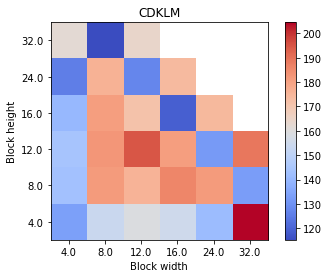

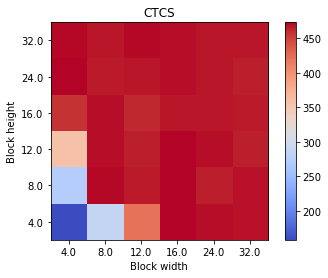

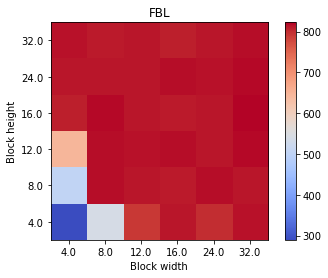

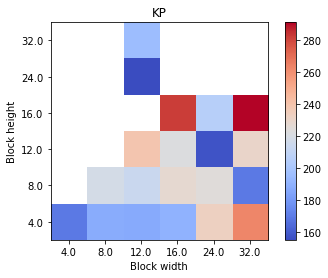

In [5]:
simulators = np.unique(data[:,0])
block_widths = np.unique(data[:,1])
block_heights = np.unique(data[:,2])

for simulator in simulators:
    print(simulator)
    
    df = pd.DataFrame(index=block_widths, columns=block_heights)

    # Pick this simulator data only and sort into a dataframe
    columns = data[:,0] == simulator
    for record in data[columns]:
        block_width = record[1]
        block_height = record[2]
        megacells = np.float32(record[3])
        df[block_height][block_width] = megacells
        
    maximum = np.nanmax(df.values)
    minimum = np.nanmin(df.values)
    mean = np.nanmean(df.values)
    print(df)
    print("Maximum={:.2f}".format(maximum))
    print("Minimum={:.2f}".format(minimum))
    print("Mean={:.2f}".format(mean))

    # Plot dataframe
    x = df.index.values.astype(np.float32)
    y = df.columns.values.astype(np.float32)
    z = np.transpose(df.values.astype(np.float32))
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    img = ax.imshow(z, origin='lower', cmap=cm.coolwarm)
    plt.colorbar(img)
    plt.xticks( range(len(x)), x )
    ax.set_xlabel('Block width')
    plt.yticks( range(len(y)), y )
    ax.set_ylabel('Block height')
    plt.title(simulator)
    